In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans



#  data importing


In [2]:
df = pd.read_csv('D:\kaggle\customer segmentation\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# choosing income and spending score 

In [20]:
df1 = df.iloc[:,[3,4]].values

In [23]:
df1_df = pd.DataFrame(df1)

In [31]:
print(df1)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## find optimum number of clusters

#### within clusters sum of squares

In [45]:


wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=32)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)


In [34]:
!pip install --upgrade threadpoolctl


Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


## elbow plot

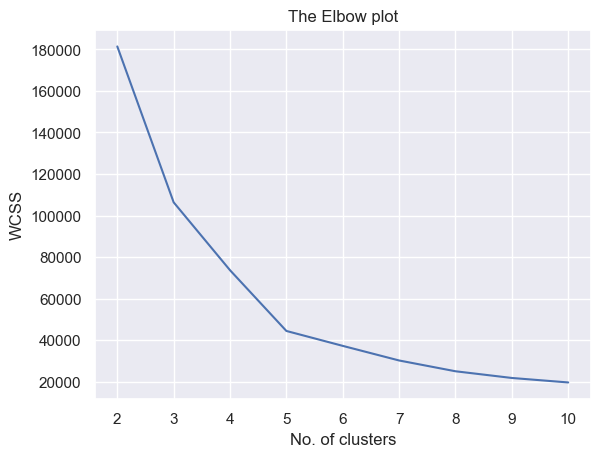

In [46]:
sn.set()
plt.plot(range(2,11),wcss)
plt.title('The Elbow plot')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()


# optimum number of clusters = 6

In [56]:
kmeans = KMeans(n_clusters = 6,init ='k-means++',random_state = 0)


### giving cluster names

In [57]:
y = kmeans.fit_predict(df1)

In [72]:
# np.unique(y)
# y.size
df1.shape

(200, 2)

### data visualization

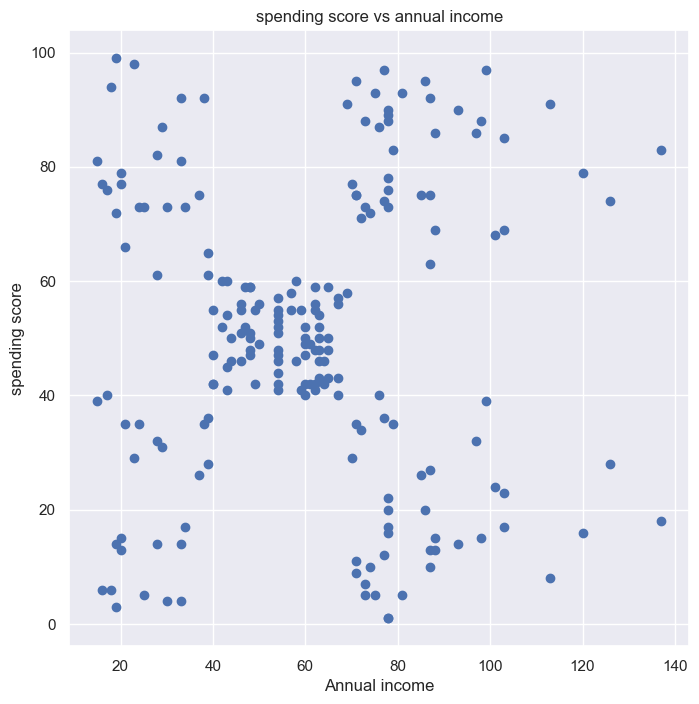

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(df1_df[0],df1_df[1])
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.title('spending score vs annual income')

plt.show()


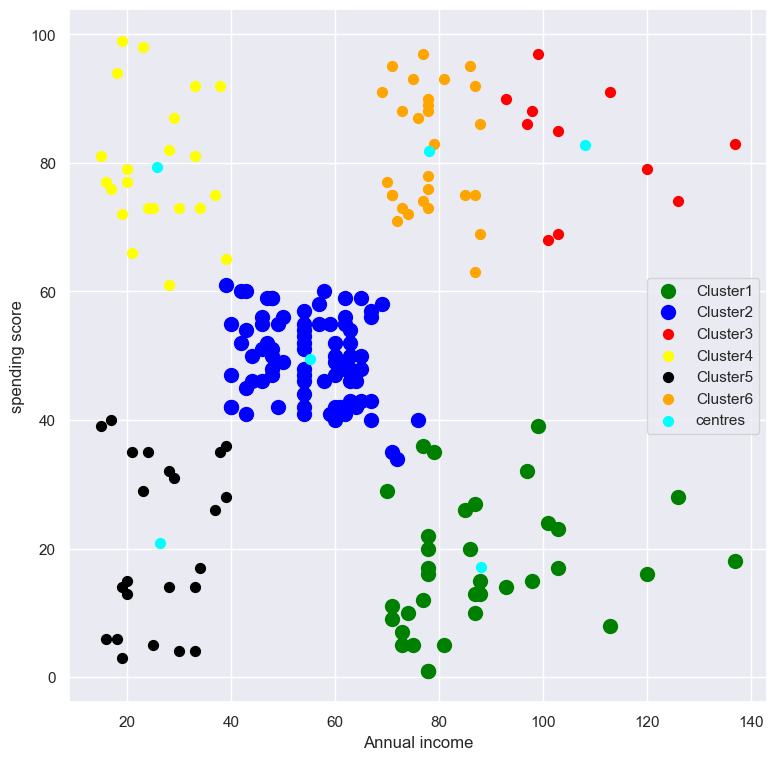

In [84]:


plt.figure(figsize=(9, 9))
plt.scatter(df1[y == 0, 0], df1[y == 0, 1], s=100, c='green', label='Cluster1')
plt.scatter(df1[y == 1, 0], df1[y == 1, 1], s=100, c='blue', label='Cluster2')
plt.scatter(df1[y == 2, 0], df1[y == 2, 1], s=50, c='red', label='Cluster3')
plt.scatter(df1[y == 3, 0], df1[y == 3, 1], s=50, c='yellow', label='Cluster4')
plt.scatter(df1[y == 4, 0], df1[y == 4, 1], s=50, c='black', label='Cluster5')
plt.scatter(df1[y == 5, 0], df1[y == 5, 1], s=50, c='orange', label='Cluster6')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c = 'cyan',label = 'centres')
plt.legend()
plt.show()
